# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Include dividends? (If yes, set to True)

In [4]:
use_adj = True

Define high low trade periods

In [5]:
sma_period = 200
percent_band = 3.5

#sma_period = 225
#percent_band = 3.0

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, use_adj, sma_period, percent_band)
s.run()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
1953-04-23 00:00:00 BUY  499 ^GSPC @ 24.19
1954-01-15 00:00:00 BUY  475 ^GSPC @ 25.43
1956-10-01 00:00:00 BUY  475 ^GSPC @ 44.70
1957-05-31 00:00:00 BUY  447 ^GSPC @ 47.43
1957-08-26 00:00:00 BUY  447 ^GSPC @ 43.89
1958-05-06 00:00:00 BUY  446 ^GSPC @ 44.01
1960-01-29 00:00:00 BUY  446 ^GSPC @ 55.61
1960-12-28 00:00:00 BUY  429 ^GSPC @ 57.78
1962-04-27 00:00:00 BUY  429 ^GSPC @ 66.30
1962-12-20 00:00:00 BUY  453 ^GSPC @ 62.82
1965-06-25 00:00:00 BUY  453 ^GSPC @ 83.06
1965-09-15 00:00:00 BUY  420 ^GSPC @ 89.52
1966-05-09 00:00:00 BUY  420 ^GSPC @ 86.32
1967-01-20 00:00:00 BUY  421 ^GSPC @ 86.07
1968-02-09 00:00:00 BUY  421 ^GSPC @ 89.86
1968-04-18 00:00:00 BUY  390 ^GSPC @ 97.08
1969-06-12 00:00:00 BUY  390 ^GSPC @ 98.26
1970-10-05 00:00:00 BUY  443 ^GSPC @ 86.47
1971-10-22 00:00:00 BUY  443 ^GSPC @ 95.57
1972-01-05 00:00:00 BUY  411 ^GSPC @ 103.06
1973-04-25 00:00:00 BUY  411 ^GSPC @ 108.34
1975-02-12 00:00:00 BUY  557 ^GSPC @ 79.92
1977-03-2

Retrieve log DataFrames

In [7]:
s.rlog, s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [8]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
0,1950-10-18,20.01,1953-04-23,24.19,4.18,2085.82,499,2085.82
1,1954-01-15,25.43,1956-10-01,44.70,19.27,9153.25,475,11239.07
2,1957-05-31,47.43,1957-08-26,43.89,-3.54,-1582.38,447,9656.69
3,1958-05-06,44.01,1960-01-29,55.61,11.60,5173.60,446,14830.29
4,1960-12-28,57.78,1962-04-27,66.30,8.52,3655.08,429,18485.37
5,1962-12-20,62.82,1965-06-25,83.06,20.24,9168.72,453,27654.09
6,1965-09-15,89.52,1966-05-09,86.32,-3.20,-1344.00,420,26310.09
7,1967-01-20,86.07,1968-02-09,89.86,3.79,1595.59,421,27905.68
8,1968-04-18,97.08,1969-06-12,98.26,1.18,460.20,390,28365.88
9,1970-10-05,86.47,1971-10-22,95.57,9.10,4031.30,443,32397.18


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-07-18,1422785.62,1410845.59,1421283.08,474,1600.89,1
2019-07-19,1426454.38,1412158.58,1412514.08,474,1600.89,1
2019-07-22,1419197.41,1412532.94,1416505.12,474,1600.89,1
2019-07-23,1426397.44,1418178.36,1426193.66,474,1600.89,1
2019-07-24,1432872.36,1432872.36,1432872.36,0,1432872.36,0


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                  1950-10-18
end                                                    2019-07-24
beginning_balance                                           10000
ending_balance                                         1432872.36
total_net_profit                                       1422872.36
gross_profit                                           1438466.63
gross_loss                                              -15594.27
profit_factor                                               92.24
return_on_initial_capital                                14228.72
annual_return_rate                                           7.49
trading_period                           68 years 9 months 6 days
pct_time_in_market                                          70.75
total_num_trades                                               30
num_winning_trades                                             25
num_losing_trades                                               5
num_even_t

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end, s._use_adj)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
2019-07-24 00:00:00 SELL 499 ^GSPC @ 3019.56


Plot Equity Curves: Strategy vs Benchmark

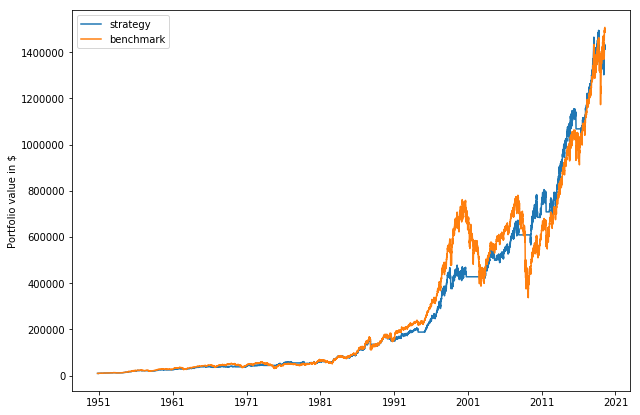

In [12]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

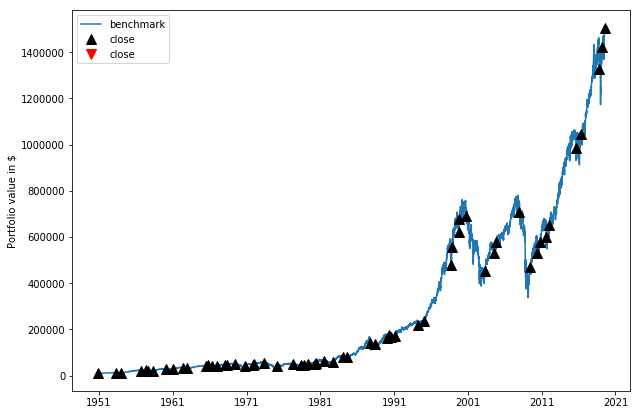

In [13]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

In [14]:
print('trading period:  {} to {}'.format(s.stats['start'], s.stats['end']))
df = pf.summary5(s.stats, benchmark.stats)
df

trading period:  1950-10-18 to 2019-07-24


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$1,432,872.36","$1,506,775.48"
total_net_profit,"$1,422,872.36","$1,496,775.48"
gross_profit,"$1,438,466.63","$1,496,775.48"
gross_loss,"-$15,594.27",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.49,7.57
max_closed_out_drawdown,-21.35,-56.77
drawdown_annualized_return,-2.85,-7.50
drawdown_recovery,-0.99,-1.42
best_month,14.94,23.49
worst_month,-13.94,-29.55
sharpe_ratio,0.75,0.56
sortino_ratio,0.85,0.72
monthly_std,2.95,4.13


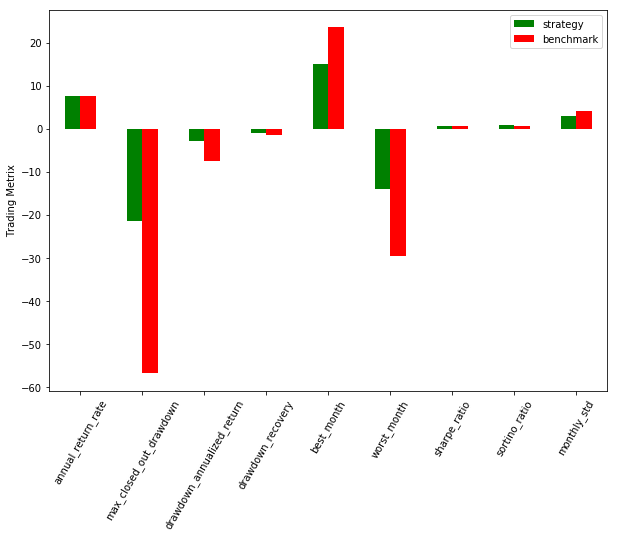

In [15]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df

Print the raw transaction log

In [16]:
pd.set_option('display.max_rows', len(s.rlog))
s.rlog

,date,price,shares,entry_exit
0,1950-10-18,20.01,499,entry
1,1953-04-23,24.19,499,exit
2,1954-01-15,25.43,475,entry
3,1956-10-01,44.70,475,exit
4,1957-05-31,47.43,447,entry
5,1957-08-26,43.89,447,exit
6,1958-05-06,44.01,446,entry
7,1960-01-29,55.61,446,exit
8,1960-12-28,57.78,429,entry
9,1962-04-27,66.30,429,exit
